# Python version

## Resources

https://www.youtube.com/watch?v=nKCT-Cdk0xY

https://academic.oup.com/bioinformatics/article/36/10/3286/5727756

## Generative model

In [1]:
n_pairs = 9
n_odds = 5
n_socks_types = n_pairs + n_odds

In [15]:
paired_socks = sorted(list(range(1, n_pairs+1))*2)
odds_socks = list(range(n_pairs+1, n_pairs+n_odds+1))
socks = paired_socks + odds_socks

In [156]:
import random
random.sample(socks, 3) # sample without replacement

[8, 2, 1]

In [30]:
def pick_socks(n_pairs=1, n_odd=1, n_pick=1):
    paired_socks = sorted(list(range(1, n_pairs+1))*2)
    odds_socks = list(range(n_pairs+1, n_pairs+n_odds+1))
    socks = paired_socks + odds_socks
    assert n_pick <= n_odd + 2*n_pairs
    return random.sample(socks, n_pick)

pick_socks(n_pairs=9, n_odd=5, n_pick=11)

[5, 4, 1, 2, 9, 10, 5, 6, 6, 4, 8]

## Prior distributions

In [88]:
from scipy.stats import nbinom, beta
import pylab as plt

(array([  8.,  29.,  30., 103., 199., 190., 313., 298., 202., 227., 178.,
         87.,  57.,  42.,  11.,  11.,  10.,   2.,   1.,   2.]),
 array([10.  , 12.65, 15.3 , 17.95, 20.6 , 23.25, 25.9 , 28.55, 31.2 ,
        33.85, 36.5 , 39.15, 41.8 , 44.45, 47.1 , 49.75, 52.4 , 55.05,
        57.7 , 60.35, 63.  ]),
 <BarContainer object of 20 artists>)

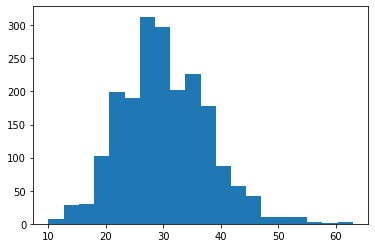

In [116]:
n_socks_prior = {'r': 30, 'p': 0.5}
r = nbinom.rvs(n_socks_prior['r'], n_socks_prior['p'], size=2000)  # get random values

plt.hist(r, bins=20)

(array([  3.,   1.,   6.,   4.,   6.,  10.,   6.,  17.,  19.,  39.,  43.,
         50.,  60.,  78., 104., 105., 123., 150., 115.,  61.]),
 array([0.55348782, 0.57566924, 0.59785066, 0.62003208, 0.64221349,
        0.66439491, 0.68657633, 0.70875774, 0.73093916, 0.75312058,
        0.77530199, 0.79748341, 0.81966483, 0.84184625, 0.86402766,
        0.88620908, 0.9083905 , 0.93057191, 0.95275333, 0.97493475,
        0.99711616]),
 <BarContainer object of 20 artists>)

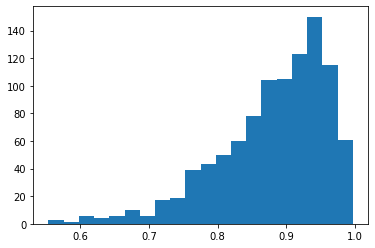

In [117]:
prop_pairs_prior = {'alpha': 15, 'beta': 2}
r = beta.rvs(prop_pairs_prior['alpha'], prop_pairs_prior['beta'], size=1000)

plt.hist(r, bins=20)

## Perform ABC

In [157]:
import math
from collections import Counter
from statistics import mean

def simulation(niter=10):
    n_socks_prior = {'r': 30, 'p': 0.5}
    prop_pairs_prior = {'alpha': 15, 'beta': 2}
    n_pick = 11
    
    posterior = []
    
    for i in range(niter):
        # sample one value from each of the priors
        n_socks = nbinom.rvs(n_socks_prior['r'], n_socks_prior['p'], size=1)[0]
        prop_pairs = beta.rvs(prop_pairs_prior['alpha'], prop_pairs_prior['beta'], size=1)[0]
        
        n_pairs = int(round(math.floor(n_socks/2)*prop_pairs))
        n_odd = n_socks - n_pairs * 2
        n_sock_types = n_pairs + n_odd
        
        if n_pick > n_odd + 2 * n_pairs:
            continue
        
        # run experiment
        picked_socks = pick_socks(n_pairs=n_pairs, n_odd=n_odd, n_pick=n_pick)

        # compute metric: count the number of unique socks
        counts = Counter(picked_socks)
        unique = len([x for x in counts if counts[x] == 1])
        pairs = len([x for x in counts if counts[x] == 2])
        
        assert pairs*2 + unique == n_pick
        
        # accept or reject experiment
        if unique == 11:
            posterior.append(n_socks)
    
    return posterior

posterior = simulation(100)
posterior

[26, 36, 36, 42, 35, 36, 37, 41, 42, 54, 46, 41, 55, 39]

## visualize posterior

33


(array([  1.,  11.,  41.,  74., 159., 249., 357., 252., 551., 616., 683.,
        599., 510., 478., 210., 311., 254., 171., 128.,  81.,  58.,  28.,
          8.,  20.,   8.,   7.,   4.,   0.,   0.,   1.]),
 array([13.        , 14.86666667, 16.73333333, 18.6       , 20.46666667,
        22.33333333, 24.2       , 26.06666667, 27.93333333, 29.8       ,
        31.66666667, 33.53333333, 35.4       , 37.26666667, 39.13333333,
        41.        , 42.86666667, 44.73333333, 46.6       , 48.46666667,
        50.33333333, 52.2       , 54.06666667, 55.93333333, 57.8       ,
        59.66666667, 61.53333333, 63.4       , 65.26666667, 67.13333333,
        69.        ]),
 <BarContainer object of 30 artists>)

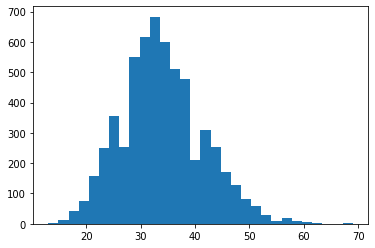

In [168]:
posterior = simulation(50000)

print(mean(posterior))

plt.hist(posterior, bins=30)